<a href="https://colab.research.google.com/github/bird0401/Instance_level_recognition/blob/main/01_data_download_tower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
from tqdm import tqdm
import requests
import re
from collections import defaultdict
import shutil
import random

In [3]:
!cp /content/drive/MyDrive/instance_level_recognition/file_urls/fileurl_dog.pickle .
!cp /content/drive/MyDrive/instance_level_recognition/file_urls/fileurl_dog_02.pickle .
!cp /content/drive/MyDrive/instance_level_recognition/file_urls/fileurl_car_02.pickle .
!cp /content/drive/MyDrive/instance_level_recognition/file_urls/fileurl_uspresident.pickle .
!cp /content/drive/MyDrive/instance_level_recognition/file_urls/fileurl_uspresident_02.pickle .
!cp /content/drive/MyDrive/instance_level_recognition/file_urls/fileurl_tower.pickle .
!cp /content/drive/MyDrive/instance_level_recognition/file_urls/fileurl_tower_02.pickle .

In [4]:
# urlを保存しているpickleファイルをロード
categories=["dog","car_02","uspresident","uspresident_02","tower","tower_02"]
category=categories[4]
# with open('/content/fileurl_car_02.pickle', 'rb') as f:
filename="/content/fileurl_"+category+".pickle"
with open(filename, 'rb') as f:
  fileurls = pickle.load(f)

In [5]:
# 画像の保存先ディレクトリ
save_image_dir = "imgs_"+category+"_100"

In [6]:
!mkdir {save_image_dir}

In [7]:
# wikiにアクセスする際にユーザエージェントが必要
ua = "VisualEntityLinkingBot/1.0 (matsushima-hiromu427@g.ecc.u-tokyo.ac.jp) download-image/1.0"
headers = {"User-Agent": ua}

# ダウンロードに時間がかかるので分割
ids=list(fileurls.keys())
random.shuffle(ids)
num_ids=100
ids_100=ids[:num_ids]

In [8]:
 # urlから画像をダウンロード

for id in tqdm(ids_100):
    c = 0
    urls = fileurls[id]
    fail_cnt = 0

    for url in urls:
        c += 1
        # print("download: ", url)
        # ダウンロードしたファイルの命名は「entity+ファイル番号」
        image_name = "Q" + str(id) + "_" + str(c).zfill(3)
        extension = url.split(".")[-1]
        image_name += "." + extension

        # try download for 5 times
        flg = False
        for _ in range(5):
            res = requests.get(url, stream=True, headers=headers)
            if res.status_code == 200:
                flg = True
                with open(save_image_dir +"/"+ image_name, "wb") as file:
                    res.raw.decode_content = True
                    shutil.copyfileobj(res.raw, file)
                break

100%|██████████| 100/100 [11:40<00:00,  7.00s/it]


# ラベルごと画像枚数の可視化

In [9]:
!ls {save_image_dir}|wc -l

2415


In [10]:
import pandas as pd

In [12]:
len_imgs_by_label=[[id,len(fileurls[id])] for id in ids_100]
df = pd.DataFrame(len_imgs_by_label,
                  columns=['id', 'num_imgs'])
print(df)

          id  num_imgs
0     780399        17
1   10858009         5
2   11775194         2
3   19962343         5
4   20851407         3
..       ...       ...
95  11225682        37
96   2062022       102
97  19832550        10
98  85004119         8
99   5968218       106

[100 rows x 2 columns]


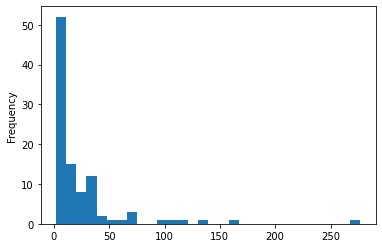

In [13]:
df['num_imgs'].plot.hist(bins=30)

# データの保存

In [14]:
!tar -zcvf {save_image_dir}.tar.gz {save_image_dir}

imgs_tower_100/
imgs_tower_100/Q2394939_002.jpg
imgs_tower_100/Q37813346_001.jpg
imgs_tower_100/Q5317_165.jpg
imgs_tower_100/Q3215092_023.jpg
imgs_tower_100/Q168400_041.jpg
imgs_tower_100/Q168400_046.jpg
imgs_tower_100/Q8557108_001.jpg
imgs_tower_100/Q2062022_075.jpg
imgs_tower_100/Q7075430_013.jpg
imgs_tower_100/Q15124146_004.JPG
imgs_tower_100/Q4878706_002.jpg
imgs_tower_100/Q12256_043.jpg
imgs_tower_100/Q18810127_009.jpg
imgs_tower_100/Q2062022_068.jpg
imgs_tower_100/Q1869530_040.jpg
imgs_tower_100/Q86903929_003.jpg
imgs_tower_100/Q19400544_006.jpg
imgs_tower_100/Q12256_082.jpg
imgs_tower_100/Q1244227_028.jpg
imgs_tower_100/Q12256_148.jpg
imgs_tower_100/Q1244227_006.jpg
imgs_tower_100/Q1576874_003.jpg
imgs_tower_100/Q56033338_045.jpg
imgs_tower_100/Q17461131_016.jpg
imgs_tower_100/Q18286440_015.jpg
imgs_tower_100/Q7075430_033.jpg
imgs_tower_100/Q5317_258.jpg
imgs_tower_100/Q1014593_005.jpg
imgs_tower_100/Q12256_003.jpg
imgs_tower_100/Q20058062_004.jpg
imgs_tower_100/Q385090_064.jpg


In [15]:
!cp /content/{save_image_dir}.tar.gz /content/drive/MyDrive/instance_level_recognition

In [16]:
!rm -r {save_image_dir}
!rm {save_image_dir}.tar.gz
# !rm fileurl_dog.pickle